In [1]:
import umap
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sampling import sampling_embedding
from mpl_toolkits.mplot3d import Axes3D




In [2]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment10.csv"
load_raw_data = pd.read_csv(raw_data_path)
# combine detail
detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes'
path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0/detail_e200.csv'
load_cellDancer=pd.DataFrame()
for i in range(1,11):
    detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
    detail=pd.read_csv(detail_path)
    load_cellDancer=load_cellDancer.append(detail)
load_cellDancer_bkup=load_cellDancer.copy()

In [3]:
# from sampling import sampling_embedding
# gene_choice=list(load_raw_data.gene_list.drop_duplicates())
data_df = load_raw_data[['gene_list', 'u0', 's0', 'cellID',
                            'embedding1', 'embedding2']]

gene = data_df['gene_list'].drop_duplicates().iloc[0]
# embedding = data_df.loc[data_df['gene_list']==gene][['embedding1','embedding2']]

# para='neighbors'
# target_amount=0
# step_i=100
# step_j=100
# mode='pca'
# n_neighbors=10
# idx_downSampling_embedding = sampling_embedding(embedding,
#             para=para,
#             target_amount=target_amount,
#             step_i=step_i,
#             step_j=step_j
#             )

cellID = data_df.loc[data_df['gene_list']==data_df.gene_list[0]]['cellID']
data_df_pivot=data_df.pivot(index='cellID', columns='gene_list', values='s0').reindex(cellID)

# embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]

# using all cells
# idx_downSampling_embedding=data_df_pivot.reset_index().index
# embedding_downsampling_0 = data_df_pivot.iloc[idx_downSampling_embedding]

In [5]:
print(data_df_pivot)

gene_list    0610010F05Rik  1110038B12Rik  1500009L16Rik  1700017B05Rik  \
cellID                                                                    
cell_363          0.312842       1.355268       0.622760       0.114831   
cell_382          0.246910       1.420308       0.870611       0.060433   
cell_385          0.168916       1.079459       0.638548       0.060933   
cell_393          0.098369       1.904841       0.443685       0.137706   
cell_398          0.116754       1.416954       0.486867       0.124115   
...                    ...            ...            ...            ...   
cell_139318       0.082322       0.551254       0.138677       0.121784   
cell_139321       0.039810       0.602661       0.042346       0.040416   
cell_139326       0.029527       0.742363       0.102660       0.089212   
cell_139327       0.028998       0.635604       0.070597       0.047425   
cell_139330       0.042932       0.758561       0.137588       0.188317   

gene_list    1700027J19R

In [70]:
# embedding_downsampling=embedding_downsampling_0.copy()

In [6]:
embedding = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(data_df_pivot)
embedding.shape

(12329, 2)

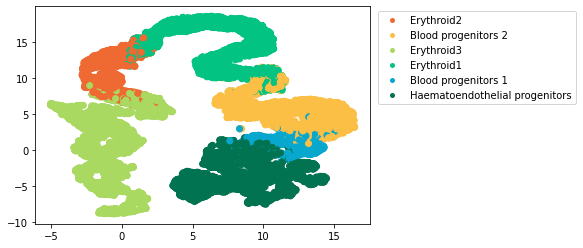

In [7]:
# 3d plot #
from colormap import *

colors = {'Erythroid2':grove2[6],
'Blood progenitors 2':grove2[5],
'Erythroid3':grove2[4],
'Erythroid1':grove2[3],
'Blood progenitors 1':grove2[2],
'Haematoendothelial progenitors':grove2[1],
'Blood progenitors 1':grove2[0]}

fig = plt.figure()
# ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(embedding[:, 0], embedding[:, 1],marker='o', c=load_raw_data[load_raw_data.gene_list ==
                                    load_raw_data.gene_list[0]]['clusters'].map(colors),)

# legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
def gen_Line2D(label, markerfacecolor):
    return Line2D([0], [0], color='w', marker='o', label=label, markerfacecolor=markerfacecolor,  markeredgewidth=0, markersize=5)
legend_elements = []
for i in colors:
    legend_elements.append(gen_Line2D(i, colors[i]))
plt.legend(handles=legend_elements, bbox_to_anchor=(1.01, 1), loc='upper left')

In [9]:
def draw_umap(data,data_c,n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    embed = fit.fit_transform(data);
    print(embed.shape)
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(embed[:,0], range(len(embed)), c=data_c)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(embed[:,0], embed[:,1], c=data_c)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(embed[:,0], embed[:,2], embed[:,1], c=data_c, s=100)
    plt.title(title, fontsize=18)
    return(embed)

(12329, 3)


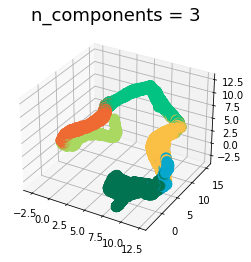

In [11]:
data_c=load_raw_data[load_raw_data.gene_list ==
                                    load_raw_data.gene_list[0]]['clusters'].map(colors)
# data=embedding_downsampling_0.copy()
embed=draw_umap(data=data_df_pivot,data_c=data_c,n_components=3, title='n_components = 3',n_neighbors=10)

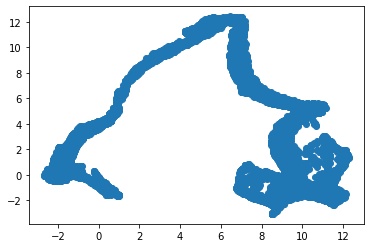

In [13]:
plt.scatter(embed[:,0],embed[:,1])

In [111]:
# for view_x in [10,30,50,80,90]:
#     for view_y in [10,30,50,80,90]:
#         fig = plt.figure()
#         ax = fig.add_subplot(111, projection='3d')
#         ax.view_init(view_x, view_y)
#         ax.scatter(embed[:,0], embed[:,2],embed[:,1], c=data_c, s=100)
#         plt.title('3d', fontsize=18)

In [15]:
embed_df=pd.DataFrame(embed)
embed_df['cluster']=''
embed_df['cluster']=load_raw_data[load_raw_data.gene_list ==
                                    load_raw_data.gene_list[0]]['clusters'].reset_index(drop=True)

In [16]:
embed_df

,0,1,2,cluster
0,9.801723,-0.844813,7.493063,Blood progenitors 2
1,10.780637,-1.873737,6.789355,Blood progenitors 2
2,10.245178,-1.167467,6.724256,Blood progenitors 2
3,10.239774,4.793844,8.579645,Blood progenitors 2
4,8.911711,1.119727,7.392460,Blood progenitors 2
...,...,...,...,...
12324,0.405322,4.170233,0.454605,Erythroid3
12325,-2.039470,0.052987,4.341649,Erythroid3
12326,-1.710746,2.148839,2.353037,Erythroid3
12327,-1.642482,1.445421,2.653335,Erythroid3


In [115]:

for enu,cluster in enumerate(colors):
    embed_df.loc[embed_df.cluster==cluster,'cluster_no']=enu

In [116]:
embed_df.to_csv("/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/umap/3D_neighbor10.csv")



In [ ]:
# get lef half of 21

In [ ]:
# plot with new embedding

from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import sys
import numpy as np


if __name__ == "__main__":
    sys.path.append('.')
    from sampling import *
    from colormap import *
else:
    try:
        from .sampling import *
        from .colormap import *
    except ImportError:
        from sampling import *
        from colormap import *

####### organize code

embedding, sampling_ixs, velocity_embedding=get_embedding(load_raw_data,load_cellDancer,gene_list=gene_list,n_neighbors=10,step=(100,100),mode='umap',pca_n_components=2,umap_n=10)





def get_embedding(load_raw_data,load_cellDancer,gene_list=None,n_neighbors=200,step=(60,60),mode=None,pca_n_components=None,umap_n=None):
    # mode: [mode='embedding', mode='gene']
    step_i,step_j=step[0],step[1]


    def corr_coeff(ematrix, vmatrix, i):
        '''
        Calculate the correlation between the predict velocity (velocity_matrix[:,i])
        and the difference between a cell and every other (cell_matrix - cell_matrix[:, i])
        '''
        # ematrix = cell_matrix
        # vmatrix = velocity_matrix
        ematrix = ematrix.T
        vmatrix = vmatrix.T
        ematrix = ematrix - ematrix[i, :]
        vmatrix = vmatrix[i, :][None, :]
        ematrix_m = ematrix - ematrix.mean(1)[:, None]
        vmatrix_m = vmatrix - vmatrix.mean(1)[:, None]

        # Sum of squares across rows
        ematrix_ss = (ematrix_m**2).sum(1)
        vmatrix_ss = (vmatrix_m**2).sum(1)
        cor = np.dot(ematrix_m, vmatrix_m.T) / \
            np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))
        return cor.T


    def velocity_correlation(cell_matrix, velocity_matrix):
        """Calculate the correlation between the predict velocity (velocity_matrix[:,i])
        and the difference between a cell and every other (cell_matrix - cell_matrix[:, i])

        Arguments
        ---------
        cell_matrix: np.ndarray (ngenes, ncells)
            gene expression matrix
        velocity_matrix: np.ndarray (ngenes, ncells)
        Return
        ---------
        c_matrix: np.ndarray (ncells, ncells)
        """
        c_matrix = np.zeros((cell_matrix.shape[1], velocity_matrix.shape[1]))
        for i in range(cell_matrix.shape[1]):
            c_matrix[i, :] = corr_coeff(cell_matrix, velocity_matrix, i)[0, :]
        np.fill_diagonal(c_matrix, 0)
        return c_matrix


    def velocity_projection(cell_matrix, velocity_matrix, embedding, knn_embedding):
        '''
        cell_matrix: np.ndarray (ngenes, ncells)
            gene expression matrix
        velocity_matrix: np.ndarray (ngenes, ncells)
        '''
        # cell_matrix = np_s0[:,sampling_ixs]
        # velocity_matrix = np_dMatrix[:,sampling_ixs]
        sigma_corr = 0.05
        cell_matrix[np.isnan(cell_matrix)] = 0
        velocity_matrix[np.isnan(velocity_matrix)] = 0
        corrcoef = velocity_correlation(cell_matrix, velocity_matrix)
        probability_matrix = np.exp(corrcoef / sigma_corr)*knn_embedding.A
        probability_matrix /= probability_matrix.sum(1)[:, None]
        unitary_vectors = embedding.T[:, None, :] - embedding.T[:, :, None]
        with np.errstate(divide='ignore', invalid='ignore'):
            unitary_vectors /= np.linalg.norm(unitary_vectors, ord=2, axis=0)
            np.fill_diagonal(unitary_vectors[0, ...], 0)
            np.fill_diagonal(unitary_vectors[1, ...], 0)
        velocity_embedding = (probability_matrix * unitary_vectors).sum(2)
        velocity_embedding -= (knn_embedding.A * unitary_vectors).sum(2) / \
            knn_embedding.sum(1).A.T  # embedding_knn.A *
        velocity_embedding = velocity_embedding.T
        return velocity_embedding


    def data_reshape(load_cellDancer):
        '''
        load detail file
        return expression matrix and velocity (ngenes, ncells)
        '''
        psc = 1
        gene_names = load_cellDancer['gene_name'].drop_duplicates().to_list()
        # cell_number = load_cellDancer[load_cellDancer['gene_name']==gene_names[0]].shape[0]
        # load_cellDancer['index'] = np.tile(range(cell_number),len(gene_names))
        # load_cellDancer['index'] = 0
        load_cellDancer.loc[:,'index']=0
        for g in gene_names:
            load_cellDancer.loc[load_cellDancer['gene_name'] == g, 'index'] = range(
                load_cellDancer[load_cellDancer['gene_name'] == g].shape[0])
        s0_reshape = load_cellDancer.pivot(
            index='gene_name', values='s0', columns='index')
        s1_reshape = load_cellDancer.pivot(
            index='gene_name', values='s1', columns='index')
        dMatrix = s1_reshape-s0_reshape
        np_s0_reshape = np.array(s0_reshape)
        np_dMatrix = np.array(dMatrix)
        np_dMatrix2 = np.sqrt(np.abs(np_dMatrix) + psc) * \
            np.sign(np_dMatrix)  # (2159, 18140)
        return(np_s0_reshape, np_dMatrix2)


    if gene_list is None:
        gene_choice=list(set(load_raw_data.gene_list))
    else:
        gene_choice=gene_list

    data_df = load_raw_data[['gene_list', 'u0', 's0', 'cellID',
                                'embedding1', 'embedding2']][load_raw_data.gene_list.isin(gene_choice)]
    # random.seed(10)
    embedding_downsampling, sampling_ixs, knn_embedding = downsampling_embedding(data_df,
                                                                                    para='neighbors',
                                                                                    target_amount=0,
                                                                                    step_i=step_i,
                                                                                    step_j=step_j,
                                                                                    n_neighbors=n_neighbors,
                                                                                mode=mode,
                                                                                 pca_n_components=pca_n_components,umap_n=umap_n)

    # print(embedding_downsampling)

    
    load_cellDancer_input = load_cellDancer[load_cellDancer.gene_name.isin(gene_choice)]
    
    def thread_s0_dmax(load_cellDancer_input,process_gene_amt_each_job=100):
        from joblib import Parallel, delayed
        load_cellDancer_input=load_cellDancer
        gene_list_choice=load_cellDancer_input.gene_name.drop_duplicates()
        load_cellDancer_input=load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice)]
        
        gene_amt=len(set(load_cellDancer_input.gene_name))
        
        # thread
        def _s0_matrix_thread(data_index,load_cellDancer_input,process_gene_amt_each_job,gene_list_choice):
            # data_index:start index of gene in load_cellDancer_input

            if data_index+process_gene_amt_each_job<gene_amt:
                load_cellDancer=load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice[data_index:(data_index+process_gene_amt_each_job)])]
            else:
                load_cellDancer = load_cellDancer_input[load_cellDancer_input.gene_name.isin(gene_list_choice[data_index:,])]
            np_s0, np_dMatrix = data_reshape(load_cellDancer) 
            return([np_s0,np_dMatrix])

        # run parallel
        result = Parallel(n_jobs=os.cpu_count(), backend="loky")(
            delayed(_s0_matrix_thread)(data_index=data_index,load_cellDancer_input=load_cellDancer_input,process_gene_amt_each_job=process_gene_amt_each_job,gene_list_choice=gene_list_choice)
            for data_index in range(0,gene_amt,process_gene_amt_each_job))
        
        # combine result
        for i,result_i in enumerate(result):
            print(i)
            np_s0=result_i[0]
            np_dMatrix=result_i[1]
            if i == 0:
                np_s0_all = np_s0
                np_dMatrix_all = np_dMatrix
            else:
                np_s0_all = np.vstack((np_s0_all, np_s0))
                np_dMatrix_all = np.vstack((np_dMatrix_all, np_dMatrix))
        return(np_s0_all,np_dMatrix_all)
    
    
    np_s0_all,np_dMatrix_all= thread_s0_dmax(load_cellDancer_input)  # 2min for 200 genes


    
    # np_s0, np_dMatrix = data_reshape(load_cellDancer)  # 2min for 200 genes
    # print(np_s0.shape)
    # print(np_dMatrix.shape)
    # if i == 301:
    # np_dMatrix_all = np_dMatrix
    # np_s0_all = np_s0
    # else:
    # np_dMatrix_all = np.vstack((np_dMatrix_all, np_dMatrix))
    # np_s0_all = np.vstack((np_s0_all, np_s0))
    print(np_dMatrix_all.shape)
    print(np_s0_all.shape)

    # embedding = load_raw_data[load_raw_data.gene_list == list(
    #     load_raw_data.gene_list[0])[0]][['embedding1', 'embedding2']].to_numpy()
    embedding = load_raw_data[load_raw_data.gene_list == 
        load_raw_data.gene_list[0]][['embedding1', 'embedding2']].to_numpy()
    velocity_embedding = velocity_projection(
        np_s0_all[:, sampling_ixs], np_dMatrix_all[:, sampling_ixs], embedding[sampling_ixs, :], knn_embedding)

    # plt.quiver(embedding[sampling_ixs,0],embedding[sampling_ixs,1],velocity_embedding[:,0],velocity_embedding[:,1])
    return(embedding, sampling_ixs, velocity_embedding)

##### run function

# get_embedding(raw_data_path,detail_result_path,n_neighbors=200,step=(60,60))

####### end - organize code

#############################################
############### velocity_embedding ##########
#############################################

# gene choice
# gene_choice=list(set(load_raw_data.gene_list))

# # add_amt=0.006
# gene_cost = pd.read_csv(
#     '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/alpha_beta_gamma_heatmap_filtered_by_gene_cost/gene_cost.csv')
# # gene_choice=gene_cost[(gene_cost.cost>0.075-add_amt) & (gene_cost.cost<0.075+add_amt)] # 512 genes
# # gene_choice=gene_choice.gene_name
# gene_cost = gene_cost.sort_values(by=['cost'])
# gene_cost = gene_cost.reset_index()

# n_neighbors_list = [50, 100, 150, 200, 250, 300]
# add_amt_gene_list = [200, 400, 600, 800, 1200, 1600, 2000]

# output_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune'


# def run_velocity_embedding(n_neighbors, add_amt_gene, load_raw_data, detail_result_path, output_path):
#     gene_choice = gene_cost[100:100+add_amt_gene]['gene_name']

#     # end gene choice
#     # end tuning


# n_neighbors_list = [50, 100, 150, 200, 250, 300]
# add_amt_gene_list = [200, 400, 600, 800, 1200, 1600, 2000]
# for n_neighbors in n_neighbors_list:
#     print('n_neighbors'+str(n_neighbors))
#     for add_amt_gene in add_amt_gene_list:
#         print('add_amt_gene'+str(add_amt_gene))
#         run_velocity_embedding(n_neighbors, add_amt_gene,
#                                load_raw_data, detail_result_path, output_path)

#############################################
############ END velocity_embedding #########
#############################################

# # comine the csv for velocity embedding
# n_neighbors_list = [50, 100, 150, 200, 250, 300]
# add_amt_gene_list = [200, 400, 600, 800, 1200, 1600, 2000]
# velocity_embedding_df = pd.DataFrame()
# for n_neighbors in n_neighbors_list:
#     for add_amt_gene in add_amt_gene_list:
#         name_embedding1 = 'embedding1_n' + \
#             str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#         name_embedding2 = 'embedding2_n' + \
#             str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#         embedding_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n' + \
#             str(n_neighbors)+'_gAmt'+str(add_amt_gene)+'.csv'
#         load_embedding_data = pd.read_csv(embedding_path)[
#             [name_embedding1, name_embedding2]]
#         velocity_embedding_df = pd.concat(
#             [velocity_embedding_df, load_embedding_data], axis=1)
#         # test=pd.read_csv(embedding_path)
#         # plt.figure()
#         # plt.quiver(test.embedding1, test.embedding2,
#         #     test[name_embedding1], test[name_embedding2],color='red')
#         # plt.savefig('/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)+'.pdf')

# # calculate correlation
# n_neighbors_list = [50, 100, 150, 200, 250, 300]
# add_amt_gene_list = [200, 400, 600, 800, 1200, 1600, 2000]


# def get_corrcoef(n_neighbors_list, add_amt_gene_list, n_neighbors, add_amt_gene, n_neighbors_compare, add_amt_gene_compare):
#     n_neighbors_list
#     corrcoef_pearson_df = pd.DataFrame(None, index=n_neighbors_list,
#                                        columns=add_amt_gene_list)

#     for n_neighbors in n_neighbors_list:
#         for add_amt_gene in add_amt_gene_list:
#             name_embedding1 = 'embedding1_n' + \
#                 str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#             name_embedding2 = 'embedding2_n' + \
#                 str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#             embedding_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n' + \
#                 str(n_neighbors)+'_gAmt'+str(add_amt_gene)+'.csv'
#             load_embedding_data = pd.read_csv(embedding_path)[
#                 [name_embedding1, name_embedding2]].to_numpy()
#             load_embedding_data_np = np.append(
#                 load_embedding_data[:, 0], load_embedding_data[:, 1])

#             name_embedding1_compare = 'embedding1_n' + \
#                 str(n_neighbors_compare)+"_"+'gAmt'+str(add_amt_gene_compare)
#             name_embedding2_compare = 'embedding2_n' + \
#                 str(n_neighbors_compare)+"_"+'gAmt'+str(add_amt_gene_compare)
#             embedding_path_compare = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n' + \
#                 str(n_neighbors_compare)+'_gAmt' + \
#                 str(add_amt_gene_compare)+'.csv'
#             load_embedding_data_compare = pd.read_csv(embedding_path_compare)[
#                 [name_embedding1_compare, name_embedding2_compare]].to_numpy()
#             load_embedding_data_compare_np = np.append(
#                 load_embedding_data_compare[:, 0], load_embedding_data_compare[:, 1])
#             corrcoef_pearson = np.corrcoef(
#                 load_embedding_data_np, load_embedding_data_compare_np)[0, 1]

#             corrcoef_pearson_df.at[n_neighbors,
#                                    add_amt_gene] = corrcoef_pearson
#     return(corrcoef_pearson_df)


# n_neighbors_compare = 300
# add_amt_gene_compare = 2000
# corrcoef_df = get_corrcoef(n_neighbors_list, add_amt_gene_list,
#                            n_neighbors, add_amt_gene, n_neighbors_compare, add_amt_gene_compare)

# # draft cell velocity

# # velocyto - cost=1
# # save_path='/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/cell_velocity/cell_velocity.pdf'
# # mel
# # save_path='output/cell_level_velocity/test2_mal2.pdf'
# save_path = None

# # end draft cell velocity

# # colorful cell velocity
# # save_path='/Users/shengyuli/OneDrive - Houston Methodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/cell_velocity/cell_velocity_colorful_all_points_'+str(fig_no)+'.pdf'
# raw_data_path = "/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/raw_data/denGyr_full.csv"
# # raw_data_path='/Users/shengyuli/OneDrive - Houston Methodist/work/Melanoma/data/cellDancer/data/input_data.csv'
# load_raw_data = pd.read_csv(raw_data_path, names=[
#                             'gene_list', 'u0', 's0', "clusters", 'cellID', 'embedding1', 'embedding2'])

# for n_neighbors in n_neighbors_list:
#     for add_amt_gene in add_amt_gene_list:
#         # save_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n'+str(n_neighbors)+'_gAmt'+str(add_amt_gene)+'_colorful_arrow.pdf'
#         save_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n' + \
#             str(n_neighbors)+'_gAmt'+str(add_amt_gene) + \
#             '_colorful_grid_curve_arrow.pdf'

#         embedding = load_raw_data[load_raw_data.gene_list == list(
#             load_raw_data.gene_list[0])[0]][['embedding1', 'embedding2']].to_numpy()
#         name_embedding1 = 'embedding1_n' + \
#             str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#         name_embedding2 = 'embedding2_n' + \
#             str(n_neighbors)+"_"+'gAmt'+str(add_amt_gene)
#         embedding_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/velocyto/neuro/detailcsv/cost_v1_all_gene/velocity_embedding_para_tune/velocity_embedding_tune_n' + \
#             str(n_neighbors)+'_gAmt'+str(add_amt_gene)+'.csv'
#         load_embedding_velocity_data = pd.read_csv(embedding_path, index_col=0)
#         sampling_ixs = load_embedding_velocity_data.index
#         velocity_embedding = load_embedding_velocity_data[[
#             name_embedding1, name_embedding2]].to_numpy()
#         custom_xlim = (-23, 45)
#         pl.velocity_cell_map(load_raw_data, embedding, sampling_ixs, velocity_embedding,
#                                     save_path=save_path, curve_grid=True, custom_xlim=custom_xlim)
#         # pl.velocity_cell_map_draft(embedding,sampling_ixs,velocity_embedding,save_path=save_path)

# end colorful cell velocity

